In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews=pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews)

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  produ

In [3]:
#View data types
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


In [4]:
#View meta data for reviews
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
#Descriptive statistics for reviews
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [6]:
#Remove redundant column language
print (reviews)
del reviews ["language"]
print("\nData frame after deleting the column '[language]':\n")
print (reviews.columns)

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  produ

In [7]:
#Remove redundant column platform 
print (reviews)
del reviews ["platform"]
print("\nData frame after deleting the column '[platform]':\n")
print (reviews.columns)

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education platform  product  \
0  

In [8]:
#Change remuneration column name 
reviews= reviews.rename(columns= {"remuneration (k£)":"remuneration"})
print (reviews) 

      gender  age  remuneration  spending_score (1-100)  loyalty_points  \
0       Male   18         12.30                      39             210   
1       Male   23         12.30                      81             524   
2     Female   22         13.12                       6              40   
3     Female   25         13.12                      77             562   
4     Female   33         13.94                      40             366   
...      ...  ...           ...                     ...             ...   
1995  Female   37         84.46                      69            4031   
1996  Female   43         92.66                       8             539   
1997    Male   34         92.66                      91            5614   
1998    Male   34         98.40                      16            1048   
1999    Male   32         92.66                       8             479   

     education  product                                             review  \
0     graduate      4

In [9]:
#Change spending score column name 
reviews= reviews.rename(columns= {"spending_score (1-100)":"spending score"})
print (reviews) 

      gender  age  remuneration  spending score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

In [10]:
#Change loyalty points column name 
reviews= reviews.rename(columns= {"loyalty_points":"loyalty points"})
print (reviews) 

      gender  age  remuneration  spending score  loyalty points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

In [11]:
# Saving the dataframe
reviews.to_csv(r'C:\Users\reshm\OneDrive\Desktop\GWEC\Policy Officer\LSE\Course Three\reviewsclean.csv')

Text(0.5, 1.0, 'Trend in loyalty points x spending score')

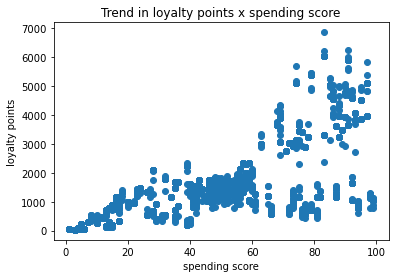

In [12]:
#Linear regression model on spending vs loyalty 
# Define the dependent variable.
y = reviews['loyalty points'].tolist()

# Define the independent variable.
x = reviews['spending score'].tolist()

# Check for linearity with Matplotlib.
plt.scatter(x, y)

# Labels for the plot 
plt.xlabel("spending score")
plt.ylabel("loyalty points")
plt.title("Trend in loyalty points x spending score")

In [13]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        21:28:10   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [15]:
# Create the linear regression model.
# Set the the coefficient to 33.0617 and the constant to -75.0527.
y_pred = (-75.0527) + 33.0617 * reviews['spending score']

# View the output
y_pred

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending score, Length: 2000, dtype: float64

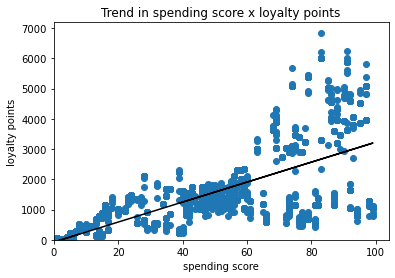

In [16]:
# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, y_pred, color='black')

#Set the x and y limits on the axis 
plt.xlim(0)
plt.ylim(0)

# Labels for the scatterplot
plt.xlabel('spending score')
plt.ylabel('loyalty points')
plt.title('Trend in spending score x loyalty points')

# Plot scatterplot
plt.show()

Text(0.5, 1.0, 'Trend in loyalty score x remuneration')

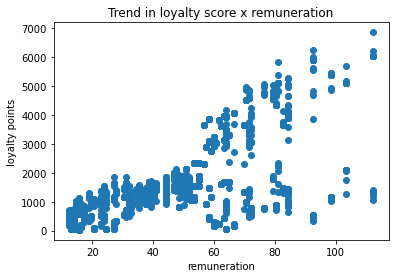

In [17]:
#Linear regression model on loyalty points vs remuneration
# Define the dependent variable.
y = reviews['loyalty points'] 

# Define the independent variable.
x = reviews['remuneration'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

# Label for x-axis
plt.xlabel("remuneration")
 
# Label for y-axis
plt.ylabel("loyalty points")
 
# Title of the plot
plt.title("Trend in loyalty score x remuneration")

In [18]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 29 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        21:28:12   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [20]:
# Create the linear regression model.
# Set the the coefficient to 34.1878 and the constant to -65.6865.
y_pred = (-65.6865) + 34.1878 * reviews['remuneration']

# View the output
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

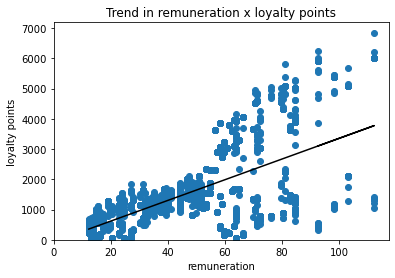

In [21]:
# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, y_pred, color='black')

#Set the x and y limits on the axis 
plt.xlim(0)
plt.ylim(0)

# Labels for the scatterplot
plt.xlabel('remuneration')
plt.ylabel('loyalty points')
plt.title('Trend in remuneration x loyalty points')

# Plot scatterplot
plt.show()

Text(0.5, 1.0, 'Trend in loyalty score x age')

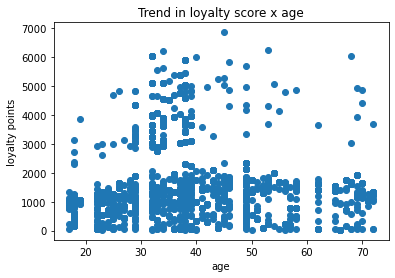

In [22]:
#Linear regression model on loyalty points vs age
# Define the dependent variable.
y = reviews['loyalty points'] 

# Define the independent variable.
x = reviews['age'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

# Label for x-axis
plt.xlabel("age")
 
# Label for y-axis
plt.ylabel("loyalty points")
 
# Title of the plot
plt.title("Trend in loyalty score x age")

In [23]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 29 Dec 2022   Prob (F-statistic):             0.0577
Time:                        21:28:13   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [25]:
# Create the linear regression model.
# Set the the coefficient to -4.01280 and the constant to 1736.5177.
y_pred = (1736.5177) - 4.01280 * reviews['age']

# View the output
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

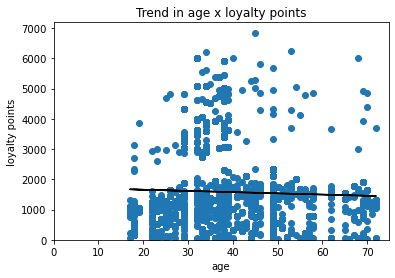

In [26]:
# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, y_pred, color='black')

#Set the x and y limits on the axis 
plt.xlim(0)
plt.ylim(0)

# Labels for the scatterplot
plt.xlabel('age')
plt.ylabel('loyalty points')
plt.title('Trend in age x loyalty points')

# Plot scatterplot
plt.show()

In [27]:
#Imports 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [28]:
# Load the clean version of the turtle reviews dataset 
reviews2 = pd.read_csv('reviewsclean.csv') 

# Print the output.
print(reviews2)
reviews2.head()

      Unnamed: 0  gender  age  remuneration  spending score  loyalty points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                            

,Unnamed: 0,gender,age,remuneration,spending score,loyalty points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [29]:
#Sense check data frame reviews 2
#View data types
print(reviews2.columns)

Index(['Unnamed: 0', 'gender', 'age', 'remuneration', 'spending score',
       'loyalty points', 'education', 'product', 'review', 'summary'],
      dtype='object')


In [30]:
#View meta data for reviews
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending score  2000 non-null   int64  
 5   loyalty points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [31]:
#Descriptive statistics for reviews
reviews2.describe()

,Unnamed: 0,age,remuneration,spending score,loyalty points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,577.494589,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,0.000000,17.000000,12.300000,1.000000,25.000000,107.000000
25%,499.750000,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,999.500000,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,1499.250000,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,1999.000000,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [32]:
#Remove redundant column language
print (reviews2)
del reviews2 ["Unnamed: 0"]
print("\nData frame after deleting the column'[Unnamed: 0]':\n")
print (reviews2.columns)

      Unnamed: 0  gender  age  remuneration  spending score  loyalty points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                            

In [33]:
#View data types 
print(reviews2.columns)

Index(['gender', 'age', 'remuneration', 'spending score', 'loyalty points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


In [34]:
#View meta data for reviews 2
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending score  2000 non-null   int64  
 4   loyalty points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [35]:
#Descriptive statistics for reviews 2
reviews2.describe()

,age,remuneration,spending score,loyalty points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


<AxesSubplot:xlabel='spending score', ylabel='remuneration'>

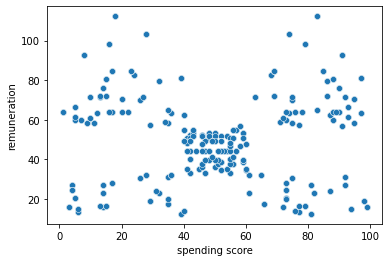

In [36]:
#Scatterplot for remuneration vs spending score 
sns.scatterplot(x='spending score',
                y='remuneration',
                data=reviews2)

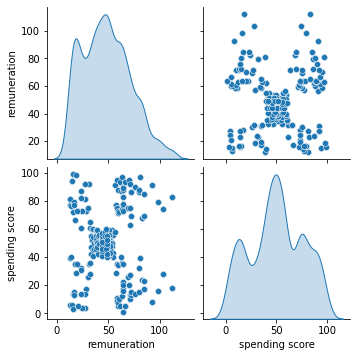

In [37]:
#Pairplot for remuneration vs spending score 
x = reviews2[['remuneration', 'spending score']]
sns.pairplot(reviews2,
             vars=x,
             diag_kind='kde')

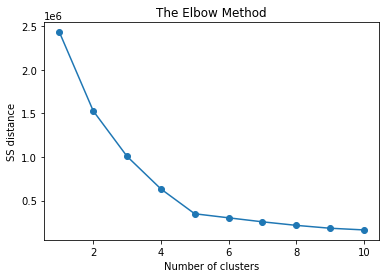

In [38]:
# Elbow chart to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

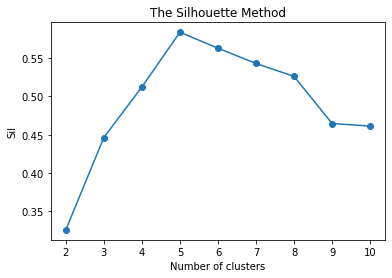

In [39]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

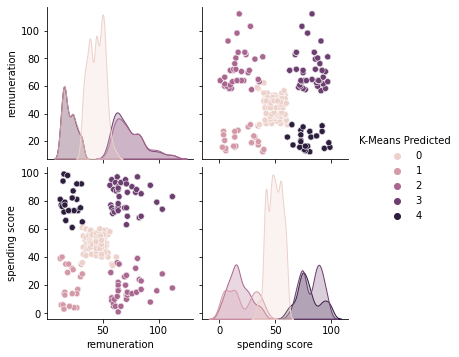

In [40]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [41]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [42]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='spending score', ylabel='remuneration'>

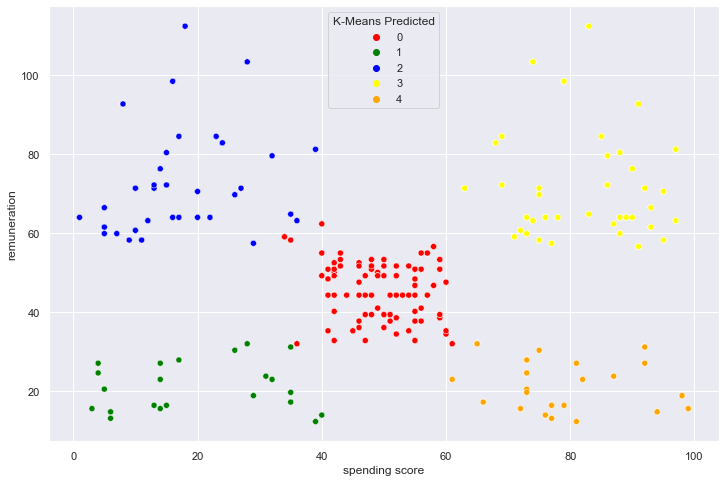

In [43]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending score' , 
                y ='remuneration',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue','yellow','orange'])

In [44]:
#Imports
import sys
print(sys.executable)

C:\Users\reshm\anaconda3\python.exe


In [45]:
#Import wordcloud 
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [46]:
#Import textblob
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [47]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import re
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
#New data frame with only the reviews and summary columns 
reviews3=reviews2[['review','summary']]
reviews3 

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [49]:
# Review: Change all to lower case and join with a space.
reviews3['review']=reviews3['review'].str.lower()
reviews3['review'].head(5)

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*:\n\nyour unpaint...
2    nice art, nice printing.  why two panels are f...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [50]:
# Summary: Change all to lower case and join with a space.
reviews3['summary']=reviews3['summary'].str.lower()
reviews3['summary'].head(5)

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [51]:
#Drop the punctuations from the review column 
reviews3['review']= reviews3['review'].str.replace('[^\w\s]','')
reviews3['review'].head(5)

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9\n\nyour unpainted...
2    nice art nice printing  why two panels are fil...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [52]:
#Drop the punctuations from the summary column 
reviews3['summary']= reviews3['summary'].str.replace('[^\w\s]','')
reviews3['summary'].head(5)

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [53]:
# Drop duplicates in both columns.
reviews3.drop_duplicates()
reviews3

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


In [54]:
# Create new DataFrame (copy DataFrame).
reviews4=reviews3.copy()
reviews4.head(5)

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [55]:
# Apply tokenisation to both columns
reviews4['token_review']=reviews4 ['review'].apply(word_tokenize)
reviews4['token_summary']=reviews4 ['summary'].apply(word_tokenize)

#View Dataframe
reviews4.head(5)

,review,summary,token_review,token_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [56]:
#Define an empty list of tokens for summary 
all_summary=[]

for i in range (reviews4.shape[0]):
    all_summary= all_summary+ reviews4['token_summary'][i]

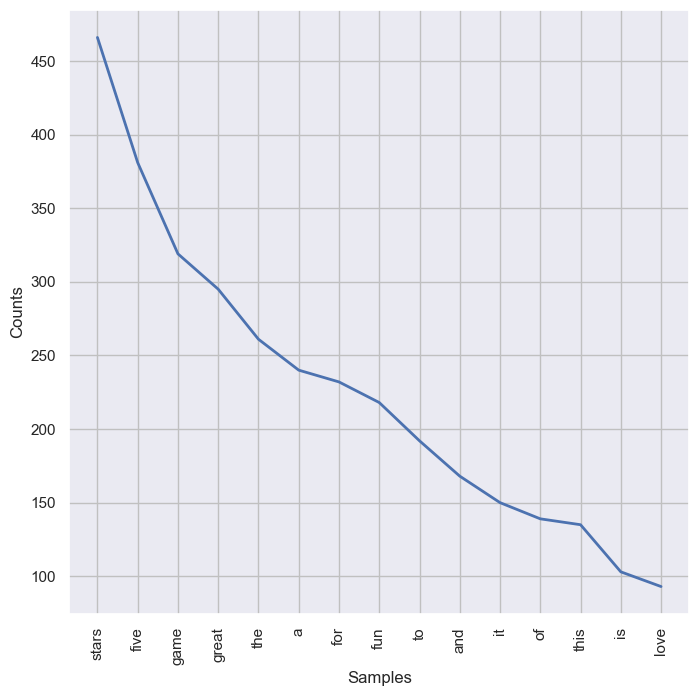

In [57]:
# Create a frequency distribution for summary
freq_dist_of_words = FreqDist(all_summary)

# Show the five most common elements in the data set.
freq_dist_of_words.most_common(5)

# Define the figure and axes.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(8, 8)

# Plot the data set.
freq_dist_of_words.plot(15, cumulative=False)

# Display the result.
plt.show()

In [58]:
#Filter out tokens that are neither alphabets nor numbers 
token_summary=[word for word in all_summary if word.isalnum()]

In [59]:
#Download the stop word list
nltk.download('stopwords')
from nltk.corpus import stopwords

#Create a set of English stop words 
english_stopwords = set(stopwords.words('english'))

token_summary2=[x for x in token_summary if x.lower() not in english_stopwords]

#Define an empty string variable 
token_summary2_string=''

for value in token_summary:
    #Add each filtered word to the string
    token_summary2_string = token_summary2_string + value +' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


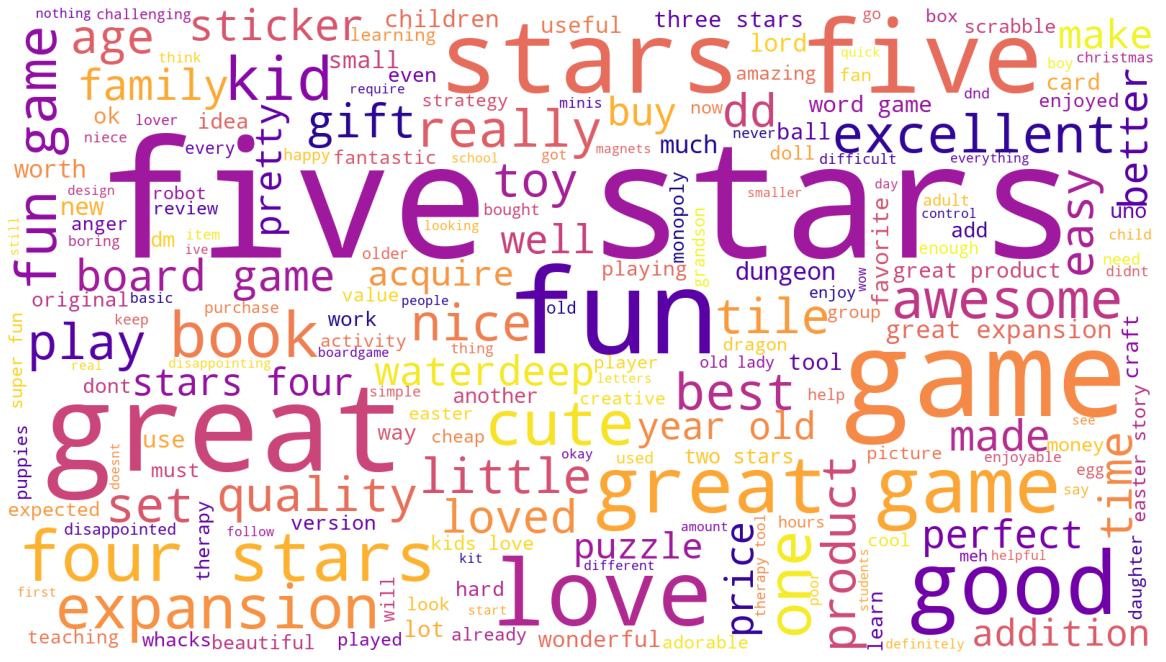

In [60]:
#Word Cloud for summary 
wordcloud=WordCloud(width=1600, height=900,
                   background_color='white',
                   colormap='plasma',
                   min_font_size=10).generate(token_summary2_string)

#Plot the wordcloud for the summary
plt.figure(figsize=(16,9),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [61]:
#Define an empty list of tokens for review 
all_review=[]

for i in range (reviews4.shape[0]):
    all_review= all_review+ reviews4['token_review'][i]

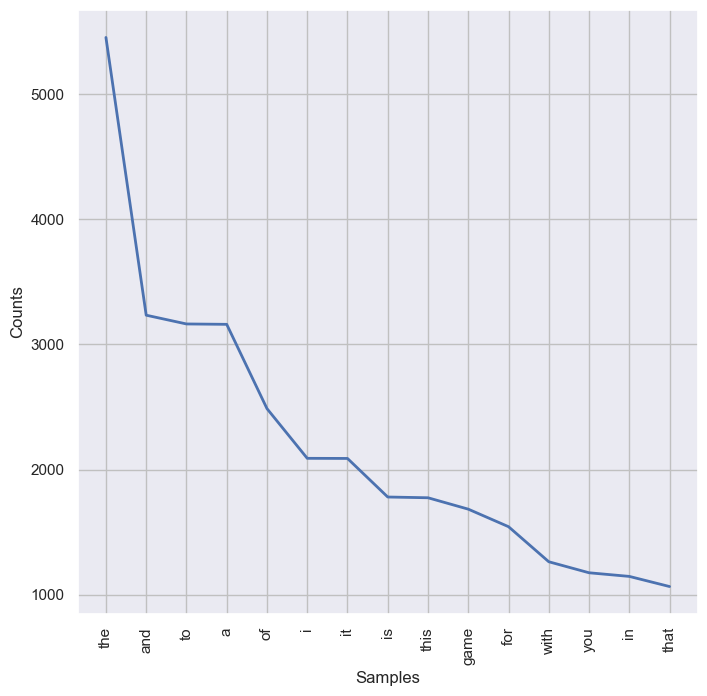

In [62]:
# Create a frequency distribution for review
freq_dist_of_words = FreqDist(all_review)

# Show the five most common elements in the data set
freq_dist_of_words.most_common(5)

# Define the figure and axes.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(8, 8)

# Plot the data set.
freq_dist_of_words.plot(15, cumulative=False)

# Display the result.
plt.show()

In [63]:
#Filter out tokens that are neither alphabets nor numbers 
token_review=[word for word in all_review if word.isalnum()]

In [64]:
token_review2=[x for x in token_review if x.lower() not in english_stopwords]

#Define an empty string variable 
token_review2_string=''

for value in token_summary:
    #Add each filtered word to the string
    token_review2_string = token_review2_string + value +' '

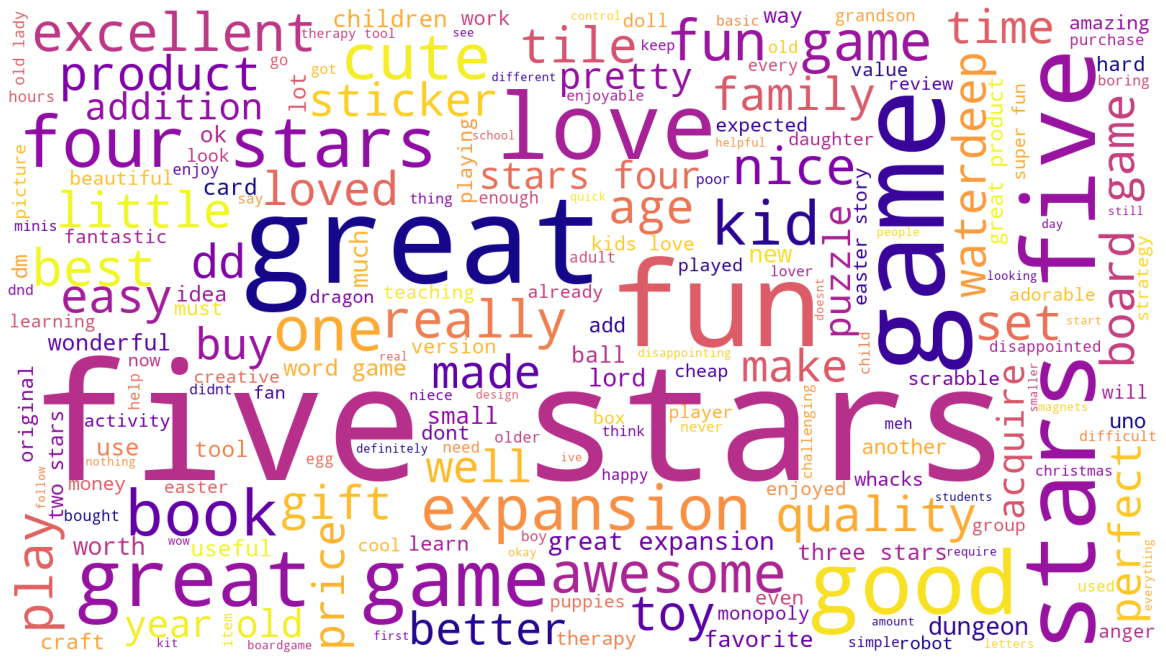

In [65]:
#Word Cloud for review 
wordcloud=WordCloud(width=1600, height=900,
                   background_color='white',
                   colormap='plasma',
                   min_font_size=10).generate(token_review2_string)

#Plot the wordcloud for the review
plt.figure(figsize=(16,9),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [66]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [67]:
# Install vaderSentiment tool.
!pip install vaderSentiment

# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

In [68]:
# Next run the polarity score function on the string.
# This will return four values in a dictionary
reviews4_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in reviews4}

In [69]:
# Create a frequency distribution for review
freq_dist_of_words = FreqDist(all_review)

# Show the five most common elements in the data set
freq_dist_of_words.most_common(15)

[('the', 5452),
 ('and', 3234),
 ('to', 3164),
 ('a', 3161),
 ('of', 2488),
 ('i', 2091),
 ('it', 2090),
 ('is', 1782),
 ('this', 1776),
 ('game', 1685),
 ('for', 1545),
 ('with', 1265),
 ('you', 1177),
 ('in', 1148),
 ('that', 1067)]